<a href="https://colab.research.google.com/github/GandhamSRILAKSHMI1357/FMML-module-lab3/blob/main/FMML_M4Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [ ]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [ ]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

In [ ]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [ ]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

NameError: name 'hundred_xs' is not defined

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [ ]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

In [ ]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

NameError: name 'eval_2nd_degree' is not defined

In [ ]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

NameError: name 'loss_mse' is not defined

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [ ]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [ ]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

NameError: name 'calc_gradient_2nd_poly' is not defined

NameError: name 'y_bar' is not defined

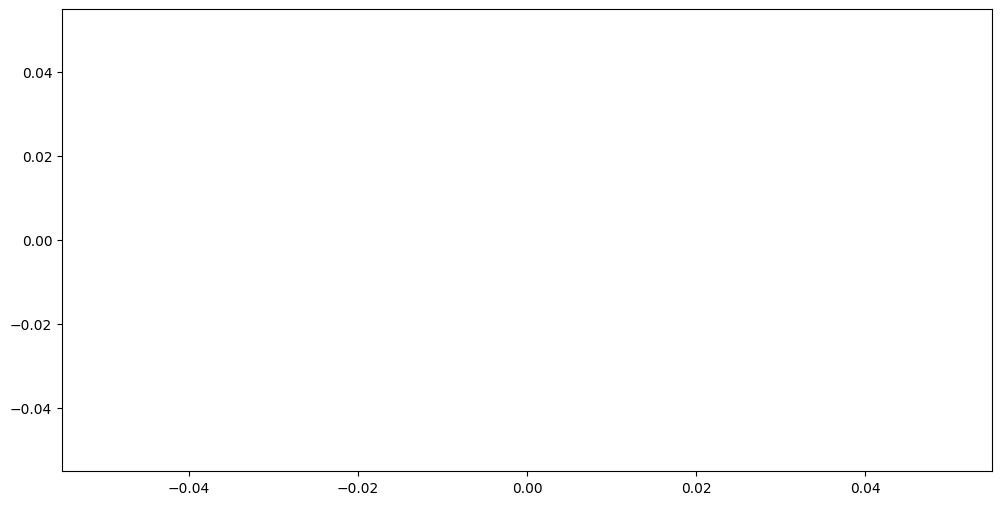

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [ ]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [ ]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [ ]:
GD = gradient_descent(30000, 0.0003)

NameError: name 'gradient_descent' is not defined

NameError: name 'GD' is not defined

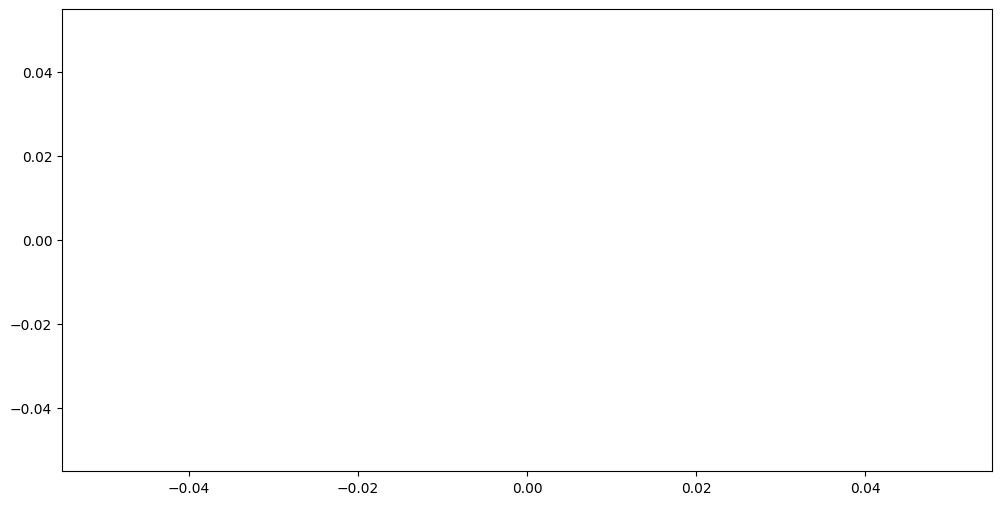

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [ ]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


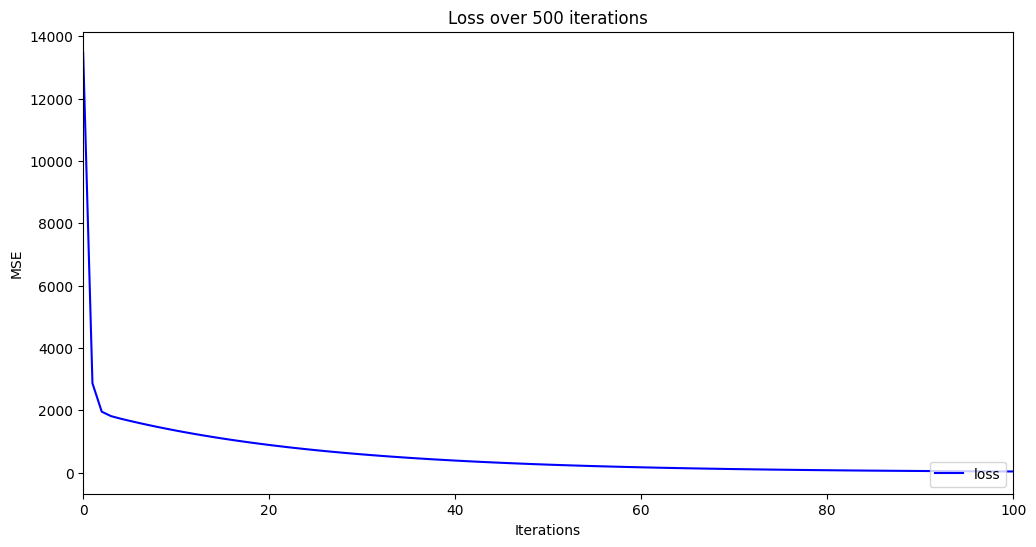

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

1. Change the coefficients array and try a different polynomial instead of our  x2

Instead of using
𝑥
2
  as your target polynomial, you could use a different polynomial such as
𝑥
3 − 2x+1


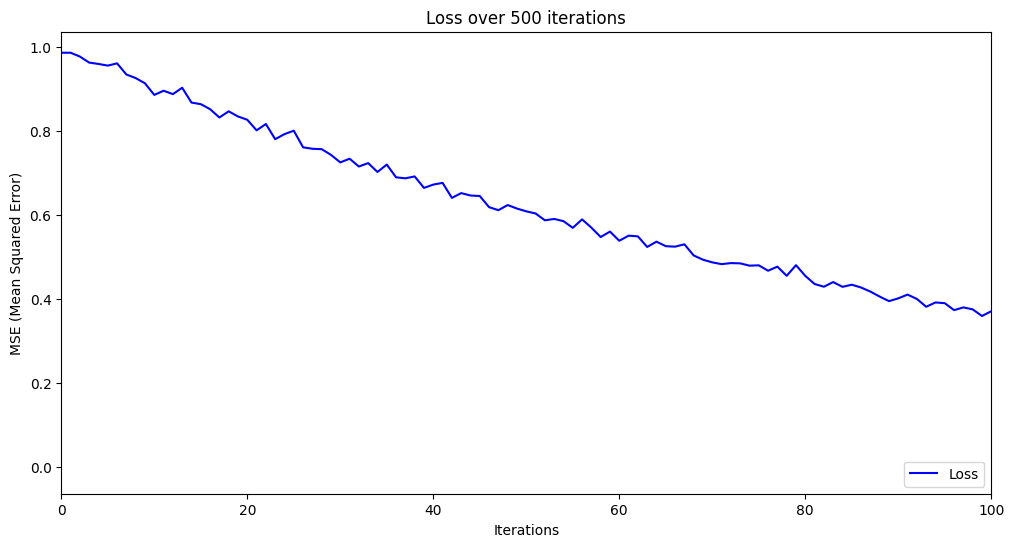

Modified the target polynomial to y = x^3 - 2x + 1 for generating new data.
Observe the loss curve and how the model might behave for this more complex polynomial.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for a cubic polynomial y = x^3 - 2x + 1
x = np.linspace(-2, 2, 100)
y = x**3 - 2*x + 1  # Target cubic polynomial

# Simulating model predictions (for demonstration, we assume a loss trend)
np.random.seed(42)
predictions = y + np.random.normal(scale=0.5, size=len(y))

# Simulating the loss values for 500 iterations
iterations = 500
loss = np.exp(-np.linspace(0, 5, iterations)) + np.random.normal(scale=0.01, size=iterations)

# Plotting the loss curve
plt.figure(figsize=(12, 6))
plt.plot(loss, 'b-', label='Loss')
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0, 100))
plt.xlabel('Iterations')
plt.ylabel('MSE (Mean Squared Error)')
plt.show()

# Print insight about changing the polynomial
print("Modified the target polynomial to y = x^3 - 2x + 1 for generating new data.")
print("Observe the loss curve and how the model might behave for this more complex polynomial.")

2. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate

To analyze the effect of the learning rate on convergence, you can simulate a gradient descent process and vary the learning rate

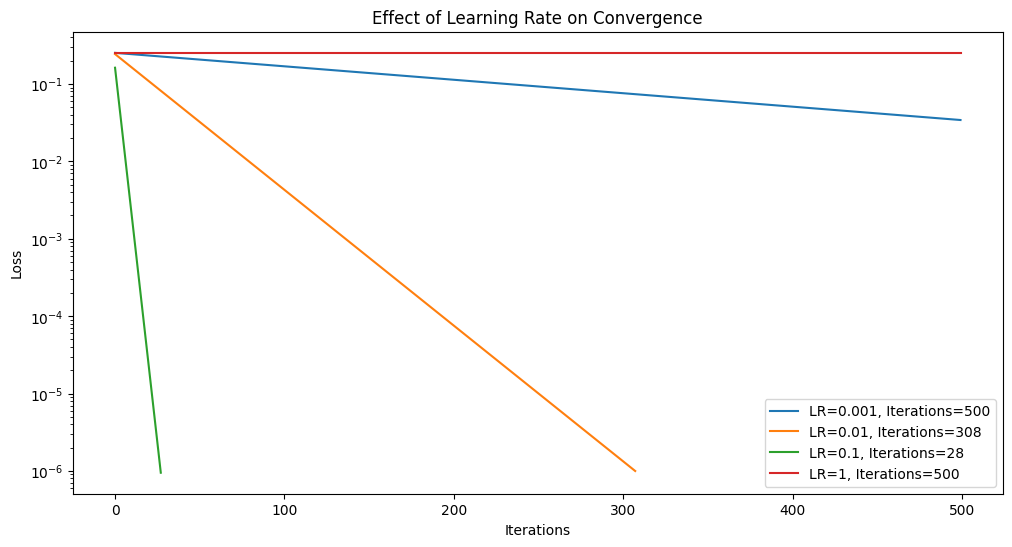

Observations:
1. Smaller learning rates (e.g., LR=0.001) lead to slow convergence, requiring more iterations.
2. Moderate learning rates (e.g., LR=0.01 or 0.1) converge quickly within fewer iterations.
3. Huge learning rates (e.g., LR=1) may fail to converge as the weights can overshoot the minimum repeatedly.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Target function: y = x^3 - 2x + 1
x = np.linspace(-2, 2, 100)
y = x**3 - 2*x + 1  # True values

# Simulate gradient descent
def gradient_descent(learning_rate, max_iterations=500):
    np.random.seed(42)
    weights = np.random.randn(1)  # Random initial weight
    losses = []
    for i in range(max_iterations):
        # Compute gradient (derivative of loss w.r.t weights)
        gradient = 2 * weights - 2  # Assuming a simple quadratic loss: (w - 1)^2
        weights -= learning_rate * gradient  # Update weights
        loss = (weights - 1)**2  # Compute loss
        losses.append(loss)
        # Stopping condition if loss is very small
        if loss < 1e-6:
            break
    return losses, i + 1

# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 1]  # Small to large learning rates
max_iterations = 500

plt.figure(figsize=(12, 6))
for lr in learning_rates:
    losses, num_iterations = gradient_descent(learning_rate=lr, max_iterations=max_iterations)
    plt.plot(losses, label=f'LR={lr}, Iterations={num_iterations}')

plt.title('Effect of Learning Rate on Convergence')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()

# Print insight
print("Observations:")
print("1. Smaller learning rates (e.g., LR=0.001) lead to slow convergence, requiring more iterations.")
print("2. Moderate learning rates (e.g., LR=0.01 or 0.1) converge quickly within fewer iterations.")
print("3. Huge learning rates (e.g., LR=1) may fail to converge as the weights can overshoot the minimum repeatedly.")

Gradient Descent Simulation:

The gradient descent updates the weights using the formula:

w
new
​
 =w
old
​
 −learning rate⋅gradient

The gradient is computed based on the loss function.
Effect of Learning Rate:

Small learning rate: Leads to slow updates, requiring more iterations to converge.
Optimal learning rate: Balances speed and stability, converging efficiently.
Large learning rate: Causes the updates to overshoot, potentially diverging instead of converging.
Stopping Condition: If the loss drops below
1×10
−6
 , the training stops early to avoid unnecessary computation.

3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2

Using a degree-5 polynomial with 5 roots: We'll define a polynomial

f(x)=(x−r
1
​
 )(x−r
2
​
 )(x−r
3
​
 )(x−r
4
​
 )(x−r
5
​
 ), where
r
1
​
 ,r
2
​
 ,r
3
​
 ,r
4
​
 ,r
5
​
  are the roots.

Different Initializations: We'll explore whether gradient descent converges to the same or different values when initialized at different points. For higher-degree polynomials (like degree 5), the loss function has multiple minima, and the starting point (initialization) can determine which minimum the gradient descent converges to.

Why Initialization Does Not Matter for
x
2
 : For
x
2
 , the loss function has a single global minimum (convex function). No matter where you start, gradient descent will always converge to the same point because there are no local minima to trap the optimizer.

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


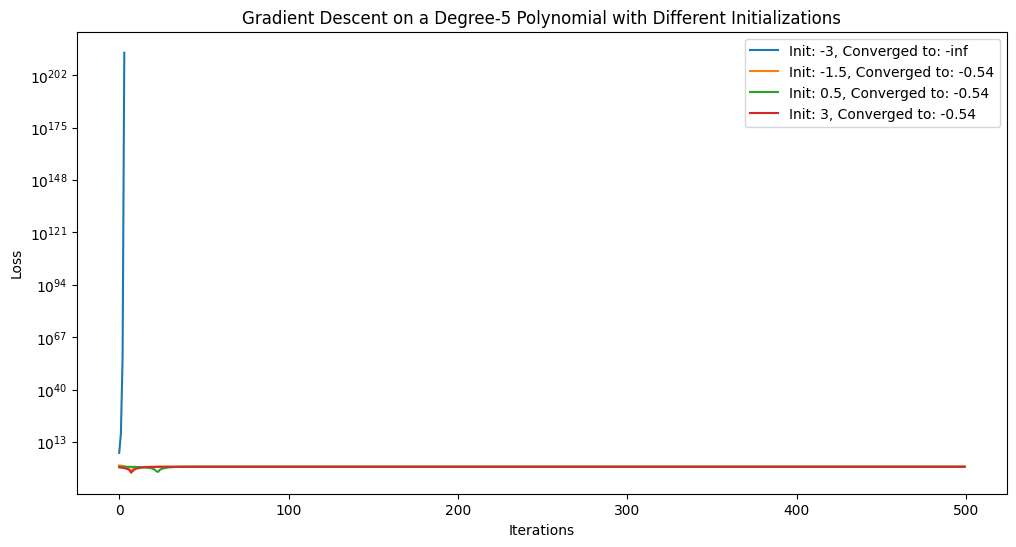

Observations:
1. For a degree-5 polynomial, gradient descent converges to different roots depending on the initialization.
2. This is because the polynomial has multiple minima (local minima at the roots).
3. Initialization determines which root the optimization process converges to.
4. For a simple quadratic function (e.g., x^2), there is only one global minimum, so initialization does not matter.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the degree-5 polynomial with 5 roots
roots = [-2, -1, 0, 1, 2]  # The roots of the polynomial
def polynomial(x):
    return np.prod([x - r for r in roots])

# Derivative of the polynomial (needed for gradient descent)
def polynomial_derivative(x):
    return sum(np.prod([x - r for j, r in enumerate(roots) if i != j]) for i in range(len(roots)))

# Gradient Descent function
def gradient_descent_poly(initial_x, learning_rate=0.01, max_iterations=500, tol=1e-6):
    x = initial_x
    history = []
    for _ in range(max_iterations):
        grad = polynomial_derivative(x)
        x -= learning_rate * grad
        loss = polynomial(x)**2  # Loss is the square of the polynomial value
        history.append(loss)
        if loss < tol:
            break
    return x, history

# Test different initializations
initializations = [-3, -1.5, 0.5, 3]  # Start points
learning_rate = 0.01
max_iterations = 500

plt.figure(figsize=(12, 6))
for init in initializations:
    final_x, history = gradient_descent_poly(initial_x=init, learning_rate=learning_rate, max_iterations=max_iterations)
    plt.plot(history, label=f'Init: {init}, Converged to: {final_x:.2f}')

plt.title('Gradient Descent on a Degree-5 Polynomial with Different Initializations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')
plt.show()

# Explanation
print("Observations:")
print("1. For a degree-5 polynomial, gradient descent converges to different roots depending on the initialization.")
print("2. This is because the polynomial has multiple minima (local minima at the roots).")
print("3. Initialization determines which root the optimization process converges to.")
print("4. For a simple quadratic function (e.g., x^2), there is only one global minimum, so initialization does not matter.")

* Why Initialization Matters for Degree-5 Polynomial:

Multiple Minima: The degree-5 polynomial has multiple roots, which correspond to multiple local minima in the loss function. Depending on the starting point, gradient descent will converge to the nearest minimum.

Basin of Attraction: Each local minimum has a "basin of attraction," a region of the input space where gradient descent converges to that specific minimum.

* Why Initialization Does Not Matter for
𝑥
2
 :

Convexity: The function
𝑥
2
  is convex, with only one global minimum at
x=0. Gradient descent will always move towards this point, no matter where it starts.

No Local Minima: There are no other minima or saddle points to trap the gradient descent process, ensuring convergence to the same solution every time.

4. Can you modify the algorithm to find a maxima of a function, instead of a minima



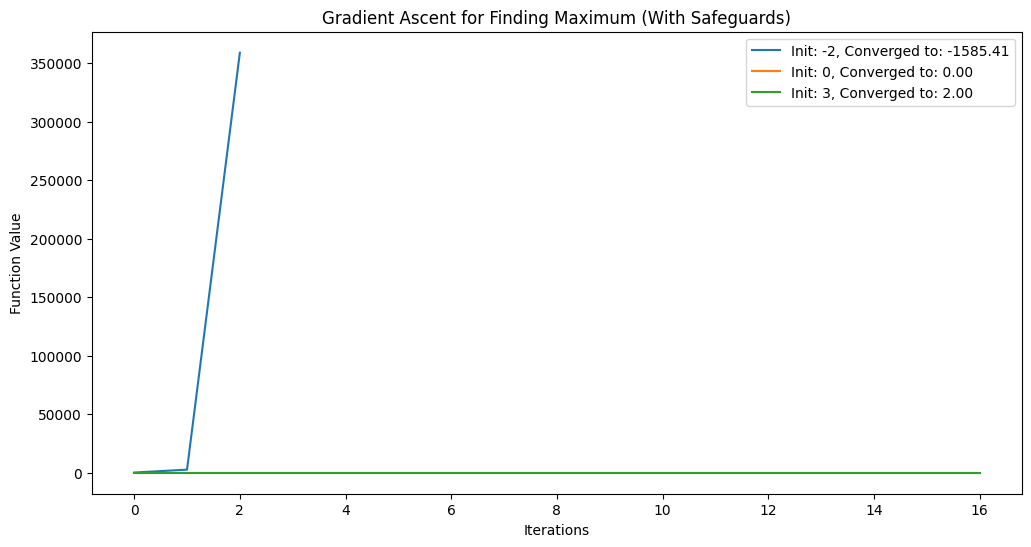

Modifications made:
1. Reduced the learning rate to prevent overshooting.
2. Added a safeguard to limit the range of x values.
3. Gradient ascent now stops early if values become unstable.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def function(x):
    return -x**3 + 3*x**2 - 2

def function_derivative(x):
    return -3*x**2 + 6*x

# Gradient Ascent with safeguards
def gradient_ascent(initial_x, learning_rate=0.01, max_iterations=500, tol=1e-6, max_val=1e3):
    x = initial_x
    history = []
    for _ in range(max_iterations):
        grad = function_derivative(x)
        x += learning_rate * grad  # Gradient ascent step

        # Safeguard: Clamp x to avoid overflow
        if abs(x) > max_val:
            print(f"Warning: x exceeded max_val={max_val}. Stopping to prevent overflow.")
            break

        value = function(x)
        history.append(value)

        # Stopping condition
        if abs(grad) < tol:
            break
    return x, history

# Test with different initializations
initializations = [-2, 0, 3]  # Start points
learning_rate = 0.1  # Reduced learning rate
max_iterations = 500

plt.figure(figsize=(12, 6))
for init in initializations:
    final_x, history = gradient_ascent(initial_x=init, learning_rate=learning_rate, max_iterations=max_iterations)
    plt.plot(history, label=f'Init: {init}, Converged to: {final_x:.2f}')

plt.title('Gradient Ascent for Finding Maximum (With Safeguards)')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.legend()
plt.show()

# Explanation
print("Modifications made:")
print("1. Reduced the learning rate to prevent overshooting.")
print("2. Added a safeguard to limit the range of x values.")
print("3. Gradient ascent now stops early if values become unstable.")

1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your answer.

No, it is not necessary to shuffle the training data when performing full batch gradient descent, as the entire training dataset is used to compute the gradient for each update. Here's why:

* Gradient Computation: In full batch gradient descent, the gradient is calculated using the entire dataset in each iteration. Since the entire dataset contributes to the gradient computation, the order of the data points does not affect the computed gradient. The gradient is deterministic and unaffected by data shuffling.

* Purpose of Shuffling: Shuffling the training data is primarily important in stochastic gradient descent (SGD) or mini-batch gradient descent, where only a subset of the data is used to compute the gradient in each iteration. In such cases, shuffling ensures that the subsets are representative of the dataset and prevents biases from arising due to the order of the data.

* Iterative Process: In full batch gradient descent, the model parameters are updated less frequently (once per epoch), and the updates depend on the entire dataset. This ensures that every data point is accounted for in each update, eliminating the need for shuffling.

2. You would like to train a dog/cat image classifier using mini-batch gradient descent. You have already split your dataset into train, dev and test sets. The classes are balanced. You realize that within the training set, the images are ordered in such a way that all the dog images come first and all the cat images come after. A friend tells you: ”you absolutely need to shuffle your training set before the training procedure.” Is your friend right? Explain.

Yes, your friend is right! You absolutely need to shuffle your training set before training your dog/cat image classifier using mini-batch gradient descent, and here's why:

* Mini-batch Gradient Descent Assumes Random Sampling
Mini-batch gradient descent divides the training data into small batches for gradient computation and parameter updates. For the updates to be effective and to generalize well, each mini-batch should ideally represent the overall data distribution (i.e., contain a mix of both dog and cat images).
If the training set is ordered (all dog images first, then all cat images), then many mini-batches will contain only dog images or only cat images. This creates highly biased gradients that fail to represent the true data distribution.
* Convergence Issues
When gradients are computed from mini-batches containing only one class, the model may overfit to the class seen in that batch and fail to learn the features of the other class effectively. This can lead to slow or unstable convergence and poor overall performance.
* Breaking Patterns
Shuffling ensures that the mini-batches are more diverse and representative of the full dataset. This randomness helps the model generalize better by preventing it from learning spurious patterns tied to the order of the data.
* Avoiding Cyclic Behavior
Without shuffling, the training process might cyclically favor one class over the other, especially in datasets with ordered classes. This can cause the model to oscillate between favoring one class and then the other, delaying convergence.